In [59]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn
import plotly.express as px
import country_converter as coco



In [60]:
df = pd.read_csv(r"C:\Users\egimenez\Downloads\Datasets\Netflix subscription fee Dec-2021.csv")

# Exploration

In [61]:
df.describe(include = 'all')

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
count,65,65,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
unique,65,65,NaN,NaN,NaN,NaN,NaN,NaN
top,ar,Argentina,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,5314.415385,3518.953846,1795.461538,8.368462,11.990000,15.612923
std,NaN,NaN,980.322633,723.010556,327.279748,1.937819,2.863979,4.040672
min,NaN,NaN,2274.000000,1675.000000,373.000000,1.970000,3.000000,4.020000
25%,NaN,NaN,4948.000000,3154.000000,1628.000000,7.990000,10.710000,13.540000
50%,NaN,NaN,5195.000000,3512.000000,1841.000000,8.990000,11.490000,14.450000
75%,NaN,NaN,5952.000000,3832.000000,1980.000000,9.030000,13.540000,18.060000


In [62]:
df.shape

(65, 8)

In [63]:
df.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


In [64]:
df = df.drop(df.columns[0], axis = 1)

In [65]:
df.isnull().sum()/len(df) * 100

Country                          0.0
Total Library Size               0.0
No. of TV Shows                  0.0
No. of Movies                    0.0
Cost Per Month - Basic ($)       0.0
Cost Per Month - Standard ($)    0.0
Cost Per Month - Premium ($)     0.0
dtype: float64

# Adding column to visualize in a choropleth

In [70]:
country_abbreviation = coco.convert(df['Country'], to='ISO3')
df['Country Abbreviation'] = country_abbreviation


In [72]:
fig = px.choropleth(df, locations='Country Abbreviation', color='Cost Per Month - Basic ($)', color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [73]:
fig = px.choropleth(df, locations='Country Abbreviation', color='Cost Per Month - Premium ($)', color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Create new dataframe 
With top and bottom countries by Number of movies.

In [74]:
top_countries = df.nlargest(5, 'No. of Movies')
df_top = pd.DataFrame(top_countries)
df_top

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Country Abbreviation
35,Malaysia,5952,3565,2387,8.29,10.65,13.02,MYS
44,Philippines,6362,4154,2208,7.35,9.14,10.93,PHL
50,Singapore,6303,4109,2194,9.51,12.81,16.11,SGP
26,India,5843,3718,2125,2.64,6.61,8.60,IND
61,United Kingdom,6643,4551,2092,7.91,13.20,18.48,GBR


In [75]:
low_countries = df.nsmallest(5, 'No. of Movies')
df_low = pd.DataFrame(low_countries)
df_low

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Country Abbreviation
49,San Marino,2310,1937,373,9.03,14.67,20.32,SMR
11,Croatia,2274,1675,599,9.03,11.29,13.54,HRV
33,Liechtenstein,3048,1712,1336,12.88,20.46,26.96,LIE
55,Sweden,4361,2973,1388,10.90,14.20,19.70,SWE
16,Finland,4045,2638,1407,9.03,13.54,18.06,FIN


In [76]:
df_top_low = pd.concat([df_top, df_low], axis=0)
df_top_low = df_top_low.sort_values(by='No. of Movies', ascending = False)

# Visualize

Text(0, 0.5, 'Countries')

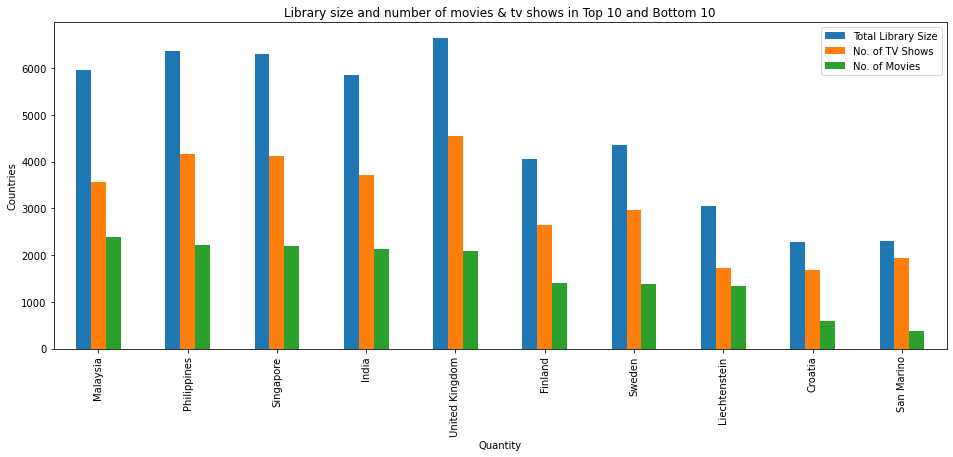

In [77]:
df_top_low.plot(x="Country", y=["Total Library Size", "No. of TV Shows", "No. of Movies"], kind="bar", figsize=(16,6))

plt.title('Library size and number of movies & tv shows in Top 10 and Bottom 10')
plt.xlabel("Quantity")
plt.ylabel("Countries")